## Dataset

In [0]:
import tensorflow as tf
import os

data_zip = tf.keras.utils.get_file('dataset.zip',
                                        extract=True,
                                        cache_subdir=os.path.abspath('.'),
                                        # origin="https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/apple2orange.zip")
                                        origin='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip')


In [2]:
from model import CycleGAN

gan = CycleGAN(mode='train', base='resnet', verbose=False)
gan.build()

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


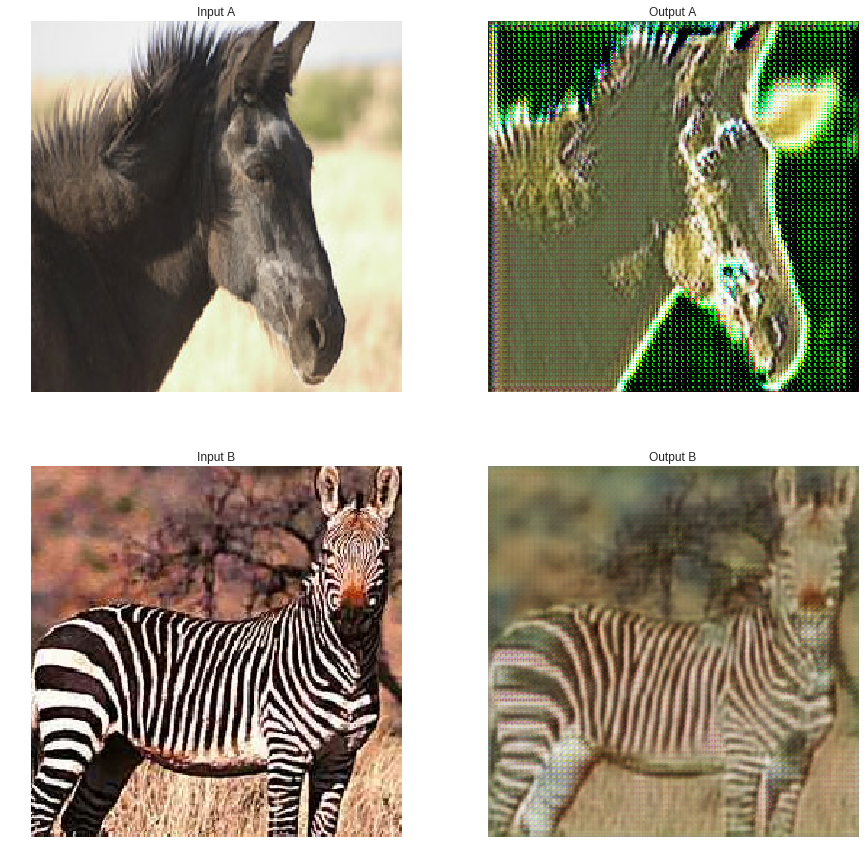

[Epoch 3/100] [Batch 202/1000] [D_A loss: 0.133519, acc:  81%] [D_B loss: 0.093899, acc:  87%] [G loss: 4.001641] time: 1.372955560684204
[Epoch 3/100] [Batch 203/1000] [D_A loss: 0.136065, acc:  83%] [D_B loss: 0.049819, acc:  98%] [G loss: 4.513338] time: 1.279783010482788
[Epoch 3/100] [Batch 204/1000] [D_A loss: 0.072316, acc:  96%] [D_B loss: 0.028652, acc:  99%] [G loss: 4.288712] time: 1.2946882247924805
[Epoch 3/100] [Batch 205/1000] [D_A loss: 0.062134, acc:  94%] [D_B loss: 0.026643, acc:  99%] [G loss: 3.944734] time: 1.2958002090454102
[Epoch 3/100] [Batch 206/1000] [D_A loss: 0.389375, acc:  54%] [D_B loss: 0.017660, acc:  99%] [G loss: 4.482696] time: 1.2914791107177734
[Epoch 3/100] [Batch 207/1000] [D_A loss: 0.195109, acc:  73%] [D_B loss: 0.044747, acc:  98%] [G loss: 5.664309] time: 1.3005890846252441
[Epoch 3/100] [Batch 208/1000] [D_A loss: 0.143429, acc:  82%] [D_B loss: 0.068760, acc:  94%] [G loss: 4.877166] time: 1.2869579792022705
[Epoch 3/100] [Batch 209/1000

In [0]:
gan.compile(learning_rate=2e-4)
gan.train(os.path.abspath('.') + '/horse2zebra/trainA/*.jpg', os.path.abspath('.') + '/horse2zebra/trainB/*.jpg', epochs=100, 
          steps_per_epoch=1000, batch_size=1, image_save_path='./output/', model_save_path='./models/',
          save_image_every_step=50, save_model_every_epoch=1,
          show_image=True, load_model=False, model_load_path='./models/')

In [0]:
os.mkdir('./output')
os.mkdir('./models')

## Save model to Google cloud

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'model-disc-a.h5'})
uploaded.SetContentFile('./models/model-disc-a.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'model-disc-b.h5'})
uploaded.SetContentFile('./models/model-disc-b.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'model-gan.h5'})
uploaded.SetContentFile('./models/model-gan.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

    100% |████████████████████████████████| 993kB 20.1MB/s 
Uploaded file with ID 1-GwlVFw_pYxEq_v61k-OngKvQu6iRMY3
Uploaded file with ID 1lkUiUNrLW9BofTAVb70iSfjNH4KYkfWM
Uploaded file with ID 1GXXUxSmfYJVZ047hqU52HQt8lXDW5iC3


# Get model from Google cloud

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# os.makedirs('./logo_checkpoints/')
file_id = '1-GwlVFw_pYxEq_v61k-OngKvQu6iRMY3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-disc-a.h5')
file_id = '1lkUiUNrLW9BofTAVb70iSfjNH4KYkfWM'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-disc-b.h5')
file_id = '1GXXUxSmfYJVZ047hqU52HQt8lXDW5iC3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-gan.h5')
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))